<h1 class='font-effect-3d' style='color:firebrick; font-family:Akronim; font-size:200%;'> Code Modules, Helpful Functions, Styling, and Links</h1>
<h2><a style='font-family:Akronim;' href='https://github.com/OlgaBelitskaya/deep_learning_projects/blob/master/DL_PP5'>Github Version &</a> <a style='font-family:Akronim;' href='https://colab.research.google.com/drive/1Tt3qZePsf2P6kNNao-hQ58DlG71Abj5a'>Colaboratory Version</a></h2>

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Akronim|Roboto&effect=3d');
body {background-color:#f7e8e8;} 
h4 {color:crimson; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt {color:crimson; font-family:Akronim;} 
div.input_prompt {color:firebrick; font-family:Akronim;} 
div.output_area pre {font-size:14px; color:crimson; font-family:Roboto;}
div.output_subarea {font-size:16px; color:crimson}
div.output_stderr pre {background-color:#f7e8e8;}
</style>

In [2]:
import warnings; warnings.filterwarnings('ignore')
import h5py,os,pandas as pd,numpy as np
import seaborn as sn,pylab as pl
import keras as ks,tensorflow as tf
from skimage import io,transform,color,measure
from IPython.core.magic import register_line_magic
from sklearn.model_selection import train_test_split
from keras.callbacks import \
ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential,Model
from keras.layers import Input,Activation,Dense,\
LSTM,Flatten,Dropout,BatchNormalization,\
Conv2D,MaxPooling2D,GlobalMaxPooling2D,\
GlobalAveragePooling2D,PReLU,LeakyReLU
from IPython.display import display,HTML
from keras import __version__
print('keras version:', __version__)
print('tensorflow version:',tf.__version__)
pl.style.use('seaborn-whitegrid')
fw='/checkpoints'
np.set_printoptions(precision=6)
n=np.random.choice(484,size=6,replace=False)

Using TensorFlow backend.


keras version: 2.1.5
tensorflow version: 1.7.0-rc1


In [3]:
def tts(X,y): 
    x_train,x_test,y_train,y_test=\
    train_test_split(X,y,test_size=.2,random_state=1)
    n=int(len(x_test)/2)
    x_valid,y_valid=x_test[:n],y_test[:n]
    x_test,y_test=x_test[n:],y_test[n:]
    return x_train,x_valid,x_test,y_train,y_valid,y_test
def history_plot(fit_history,fig_size):
    keys=list(fit_history.history.keys())
    list_history=[fit_history.history[keys[i]] 
                  for i in range(len(keys))]
    dfkeys=pd.DataFrame(list_history).T
    dfkeys.columns=keys
    fig=pl.figure(figsize=(fig_size,fig_size))
    ax1=fig.add_subplot(2,1,1)
    dfkeys.iloc[:,[0,2]].plot(
        ax=ax1,color=['crimson','firebrick'],grid=True)
    ax2=fig.add_subplot(2,1,2)
    dfkeys.iloc[:,[1,3]].plot(
        ax=ax2,color=['crimson','firebrick'],grid=True)
    pl.tight_layout(); pl.show()
def history_plot2(fit_history):
    lk=[1,2,3]
    keys=list(fit_history.history.keys())[8:]
    pl.figure(figsize=(10,10)); pl.subplot(211)
    pl.plot(fit_history.history[keys[0]],
            color='crimson',label='valid 1')
    pl.plot(fit_history.history[keys[1]],
            color='firebrick',label='valid 2')
    pl.plot(fit_history.history[keys[2]],
            color='#ff355e',label='valid 3')
    pl.xlabel('Epochs'); pl.ylabel('Loss')
    pl.legend(); pl.grid(); pl.title('Loss Function')     
    pl.subplot(212)
    pl.plot(fit_history.history[keys[3]],
            color='crimson',label='valid 1')
    pl.plot(fit_history.history[keys[4]],
            color='firebrick',label='valid 2')
    pl.plot(fit_history.history[keys[5]],
            color='#ff355e',label='valid 3')
    pl.xlabel('Epochs'); pl.ylabel('Accuracy')    
    pl.legend(); pl.grid(); pl.title('Accuracy')
    pl.tight_layout(); pl.show()

<h1 class='font-effect-3d' style='color:firebrick; font-family:Akronim; font-size:200%;'> Data Loading and Exploration </h1>

In [4]:
url='../input/traditional-decor-patterns/'
data=pd.read_csv(url+'decor.csv')
data.loc[n]

,country_label,country,decor_label,decor,type_label,type,file
83,1,Russia,1,Gzhel,2,product,01_01_2_051.png
328,2,Poland,4,Wycinanki łowickie,2,product,02_04_2_023.png
423,3,Turkey,5,Iznik,1,product,03_05_2_018.png
30,1,Russia,1,Gzhel,1,pattern,01_01_1_031.png
164,1,Russia,2,Khokhloma,2,product,01_02_2_046.png
451,4,Belarus,6,Neglyubka,1,pattern,04_06_1_007.png


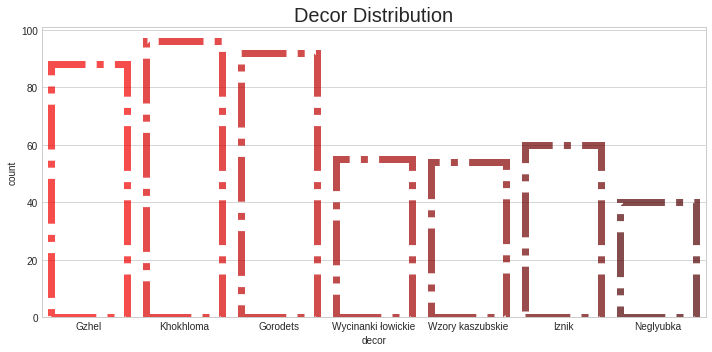

In [5]:
pl.figure(figsize=(10,5))
sn.countplot(
    x='decor',data=data,facecolor=(0,0,0,0),
    linewidth=7,linestyle='-.',alpha=.7,fill=None,
    edgecolor=sn.color_palette('flag',7))
pl.title('Decor Distribution',fontsize=20)
pl.tight_layout();

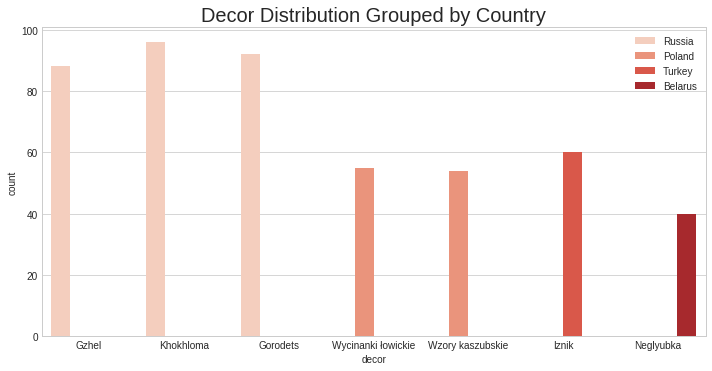

In [6]:
pl.figure(figsize=(10,5))
sn.countplot(
    x='decor',hue='country',data=data,palette='Reds')
pl.legend(loc=1); pl.tight_layout()
ti='Decor Distribution Grouped by Country'
pl.title(ti,fontsize=20);

In [7]:
with h5py.File(url+'DecorColorImages.h5','r') as f:
    keys=list(f.keys())
    [countries,decors,images,types]=\
    [np.array(f[keys[i]]) for i in range(4)]
    f.close()
for el in [countries,decors,types]: el-=1 
sh=[el.shape for el in [countries,decors,images,types]]
pd.DataFrame(sh,index=keys)

,0,1,2,3
countries,485,NaN,NaN,NaN
decors,485,NaN,NaN,NaN
images,485,150.0,150.0,3.0
types,485,NaN,NaN,NaN


In [8]:
print(set(data['decor']))
print(set(data['country']))
print(set(decors))
print(set(countries))

{'Wycinanki łowickie', 'Gzhel', 'Gorodets', 'Wzory kaszubskie', 'Neglyubka', 'Iznik', 'Khokhloma'}
{'Russia', 'Belarus', 'Turkey', 'Poland'}
{0, 1, 2, 3, 4, 5, 6}
{0, 1, 2, 3}


<h1 class='font-effect-3d' style='color:firebrick; font-family:Akronim; font-size:200%;'> Implementation of Preprocessing Functions </h1>

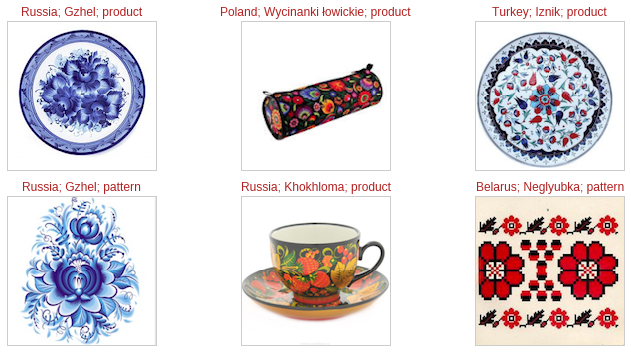

In [9]:
images=images/255
fig=pl.figure(figsize=(10,5))
for i,idx in enumerate(n):
    ax=fig.add_subplot(2,3,i+1,xticks=[],yticks=[])
    ax.imshow(images[idx])
    ti=data['country'][idx]+'; '+\
       data['decor'][idx]+'; '+data['type'][idx]
    ax.set_title(ti,color='firebrick')
pl.tight_layout()

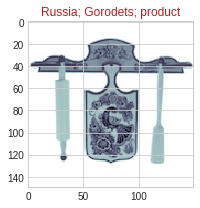

In [10]:
gray_images=np.dot(images[...,:3],[.299,.587,.114])
pl.figure(figsize=(3,3))
n=np.random.choice(484,size=1,replace=False)[0]
pl.imshow(images[n])
ti=data['country'][n]+'; '+\
   data['decor'][n]+'; '+data['type'][n]
pl.title(ti,color='firebrick'); pl.tight_layout()
pl.imshow(gray_images[n],cmap=pl.cm.bone); pl.show()
gray_images=gray_images.reshape(-1,150,150,1)

In [11]:
targets=np.vstack((countries,decors))
targets=np.vstack((targets,types)).T
pd.DataFrame([images.shape,gray_images.shape,
              countries.shape,decors.shape,
              types.shape,targets.shape])

,0,1,2,3
0,485,150.0,150.0,3.0
1,485,150.0,150.0,1.0
2,485,NaN,NaN,NaN
3,485,NaN,NaN,NaN
4,485,NaN,NaN,NaN
5,485,3.0,NaN,NaN


In [12]:
# spliting the data 
# Color Images / Countries 
x_train1,x_valid1,x_test1,\
y_train1,y_valid1,y_test1=tts(images,countries)
# Grayscaled Images / Countries 
x_train2,x_valid2,x_test2,\
y_train2,y_valid2,y_test2=tts(gray_images,countries)
# Color Images / Decors 
x_train3,x_valid3,x_test3,\
y_train3,y_valid3,y_test3=tts(images,decors)
# Grayscaled Images / Decors 
x_train4,x_valid4,x_test4,\
y_train4,y_valid4,y_test4=tts(gray_images,decors)
# Color Images / Multi-Label Targets
x_train5,x_valid5,x_test5,\
y_train5,y_valid5,y_test5=tts(images,targets)
# Grayscaled Images / Multi-Label Targets 
x_train6,x_valid6,x_test6,\
y_train6,y_valid6,y_test6=tts(gray_images,targets)
sh=[el.shape for el in \
[x_train1,y_train1,x_valid1,y_valid1,x_test1,y_test1,
 x_train3,y_train3,x_valid3,y_valid3,x_test3,y_test3,
 x_train5,y_train5,x_valid5,y_valid5,x_test5,y_test5,
 x_train2,y_train2,x_valid2,y_valid2,x_test2,y_test2,
 x_train4,y_train4,x_valid4,y_valid4,x_test4,y_test4,
 x_train6,y_train6,x_valid6,y_valid6,x_test6,y_test6]]
pd.DataFrame(sh)

,0,1,2,3
0,388,150.0,150.0,3.0
1,388,NaN,NaN,NaN
2,48,150.0,150.0,3.0
3,48,NaN,NaN,NaN
4,49,150.0,150.0,3.0
5,49,NaN,NaN,NaN
6,388,150.0,150.0,3.0
7,388,NaN,NaN,NaN
8,48,150.0,150.0,3.0
9,48,NaN,NaN,NaN


In [13]:
y_train5_list=[y_train5[:,0],y_train5[:,1],y_train5[:,2]]
y_test5_list=[y_test5[:,0],y_test5[:,1],y_test5[:,2]]
y_valid5_list=[y_valid5[:,0],y_valid5[:,1],y_valid5[:,2]]
y_train6_list=[y_train6[:,0],y_train6[:,1],y_train6[:,2]]
y_test6_list=[y_test6[:,0],y_test6[:,1],y_test6[:,2]]
y_valid6_list=[y_valid6[:,0],y_valid6[:,1],y_valid6[:,2]]

<h1 class='font-effect-3d' style='color:firebrick; font-family:Akronim; font-size:200%;'> Image Contours </h1>
<h2 style='font-family:Akronim;'>Just for fun</h2>

In [14]:
@register_line_magic
def vector(number):
    example=images[int(number)]
    gray_example=color.colorconv.rgb2grey(example)
    contours=measure.find_contours(gray_example,.85)
    pl.figure(figsize=(8,8))
    pl.gca().invert_yaxis()
    for n,contour in enumerate(contours):
        pl.plot(contour[:,1],contour[:,0],lw=1)

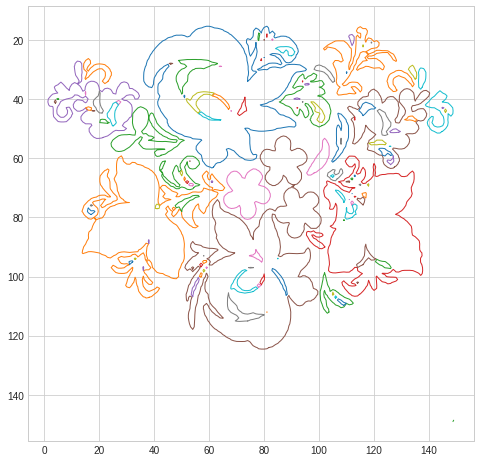

In [15]:
%vector 106

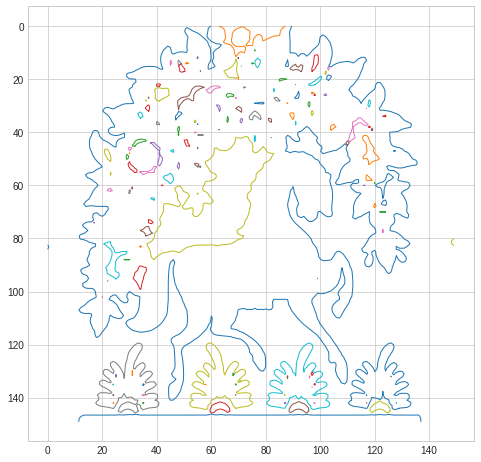

In [16]:
%vector 200

<h1 class='font-effect-3d' style='color:firebrick; font-family:Akronim; font-size:200%;'> Image Animation</h1>
<h2 style='font-family:Akronim;'>Just for fun</h2>

In [17]:
%%writefile sage_animate.html
<!DOCTYPE HTML>
<html>
  <head>
    <meta charset='utf-8'>
    <meta name='viewport' content='width=device-width'>
    <script src='https://sagecell.sagemath.org/static/embedded_sagecell.js'></script>
    <script>$(function () {
        sagecell.makeSagecell(
            {inputLocation:'div.sagehtml',evalButtonText:'run',
             template:sagecell.templates.minimal}); });
    </script>
  </head>
  <body>
<div class='sagehtml'><script type='text/x-sage'>
import warnings,numpy as np
from skimage import io,transform 
warnings.filterwarnings('ignore')
def load_img(file_path,file_name,img_size): 
    img=io.imread(file_path+file_name)
    img=transform.resize(img,[img_size,img_size]) 
    return img[:,:,:3]/255 
def interpolate_hypersphere(v1,v2,steps):
    v1norm=np.linalg.norm(v1)
    v2norm=np.linalg.norm(v2)
    v2normalized=v2*(v1norm/v2norm)
    vectors=[]
    for step in range(steps):
        interpolated=v1+(v2normalized-v1)*step/(steps-int(1))
        interpolated_norm=np.linalg.norm(interpolated)
        interpolated_normalized=\
        interpolated*(v1norm/interpolated_norm)
        vectors.append(interpolated_normalized)
    return np.array(vectors)*255
file_path='https://olgabelitskaya.gitlab.io/images/'
@interact
def _vector(file1=[1,2,3,4,5],file2=[2,3,4,5,6],
            steps=list(range(20,100,10)),
            img_size=[300,350,400]):
    file_path='https://olgabelitskaya.gitlab.io/images/'
    file_name1='02_00%s'%(file1)+'.png'
    file_name2='02_00%s'%(file2)+'.png'
    img1=load_img(file_path,file_name1,img_size)
    img2=load_img(file_path,file_name2,img_size)
    imgs=np.vstack([interpolate_hypersphere(img1,img2,steps),
                    interpolate_hypersphere(img2,img1,steps)])
    a=animate([matrix_plot(imgs[i],transparent=True,frame=False,
                           figsize=(3,3)) for i in range(2*steps)])
    a.show()
</script></div><br/>
  </body>
</html>  

Writing sage_animate.html


In [18]:
width=600; height=650; file='sage_animate.html'
string="""<div id='html_string2'><iframe src='"""+\
    file+"""' height="""+str(height+50)+\
    """ width="""+str(width+50)+"""></iframe></div>"""
display(HTML(string))

<h1 class='font-effect-3d' style='color:firebrick; font-family:Akronim; font-size:200%;'> One Simple CNN Example </h1>

In [19]:
# Color Images / Decors 
def model(leaky_alpha):
    model=Sequential()
    model.add(Conv2D(32,(5,5),padding='same', 
                     input_shape=x_train3.shape[1:]))
    model.add(LeakyReLU(alpha=leaky_alpha))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))
    model.add(Conv2D(196,(5,5)))
    model.add(LeakyReLU(alpha=leaky_alpha))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))   
    model.add(GlobalMaxPooling2D())     
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=leaky_alpha))
    model.add(Dropout(.25))     
    model.add(Dense(7))
    model.add(Activation('softmax'))   
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='nadam',metrics=['accuracy'])   
    return model
model=model(float(.005))  

In [20]:
estopping=EarlyStopping(
    monitor='val_loss',patience=20,verbose=2)
checkpointer=ModelCheckpoint(
    filepath=fw,save_best_only=True,verbose=2,
    save_weights_only=True,monitor='val_acc',mode='max')
lr_reduction=ReduceLROnPlateau(
    monitor='val_loss',verbose=2,patience=5,factor=.8)
history=model.fit(
    x_train3,y_train3,epochs=100,batch_size=16,verbose=2,
    validation_data=(x_valid3,y_valid3),
    callbacks=[checkpointer,lr_reduction,estopping])

Train on 388 samples, validate on 48 samples
Epoch 1/100
 - 11s - loss: 1.8692 - acc: 0.3041 - val_loss: 1.6832 - val_acc: 0.2292

Epoch 00001: val_acc improved from -inf to 0.22917, saving model to /checkpoints
Epoch 2/100
 - 1s - loss: 1.3628 - acc: 0.4510 - val_loss: 1.3593 - val_acc: 0.4167

Epoch 00002: val_acc improved from 0.22917 to 0.41667, saving model to /checkpoints
Epoch 3/100
 - 1s - loss: 1.2351 - acc: 0.4974 - val_loss: 1.3302 - val_acc: 0.4792

Epoch 00003: val_acc improved from 0.41667 to 0.47917, saving model to /checkpoints
Epoch 4/100
 - 1s - loss: 1.0625 - acc: 0.5799 - val_loss: 1.3723 - val_acc: 0.3750

Epoch 00004: val_acc did not improve
Epoch 5/100
 - 1s - loss: 0.9868 - acc: 0.5825 - val_loss: 1.3112 - val_acc: 0.4375

Epoch 00005: val_acc did not improve
Epoch 6/100
 - 1s - loss: 0.8065 - acc: 0.6881 - val_loss: 1.1163 - val_acc: 0.5833

Epoch 00006: val_acc improved from 0.47917 to 0.58333, saving model to /checkpoints
Epoch 7/100
 - 1s - loss: 0.7380 - ac

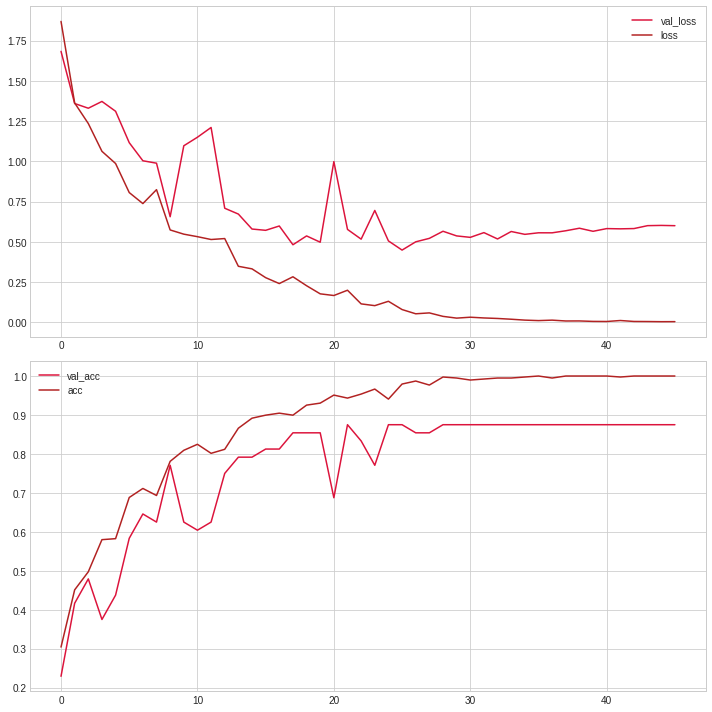

[0.7730522034119587, 0.8163265366943515]

In [21]:
history_plot(history,10)
model.load_weights(fw)
model.evaluate(x_test3,y_test3,verbose=0)